In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt

### importando os csvs

In [2]:
# https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv
atletas = pd.read_csv('../../../data/olimpiadas/athlete_events.csv')

In [3]:
noc = pd.read_csv('../../../data/olimpiadas/noc_regions.csv')

### Conhecendo a estrutura do conjunto dados

In [4]:
atletas.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [6]:
noc.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

### Verificando missing data

In [7]:
atletas.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

In [8]:
noc.isna().sum()

NOC         0
region      3
notes     209
dtype: int64

In [10]:
# biblioteca para visualizar dados ausentes
import missingno as msno

<AxesSubplot:>

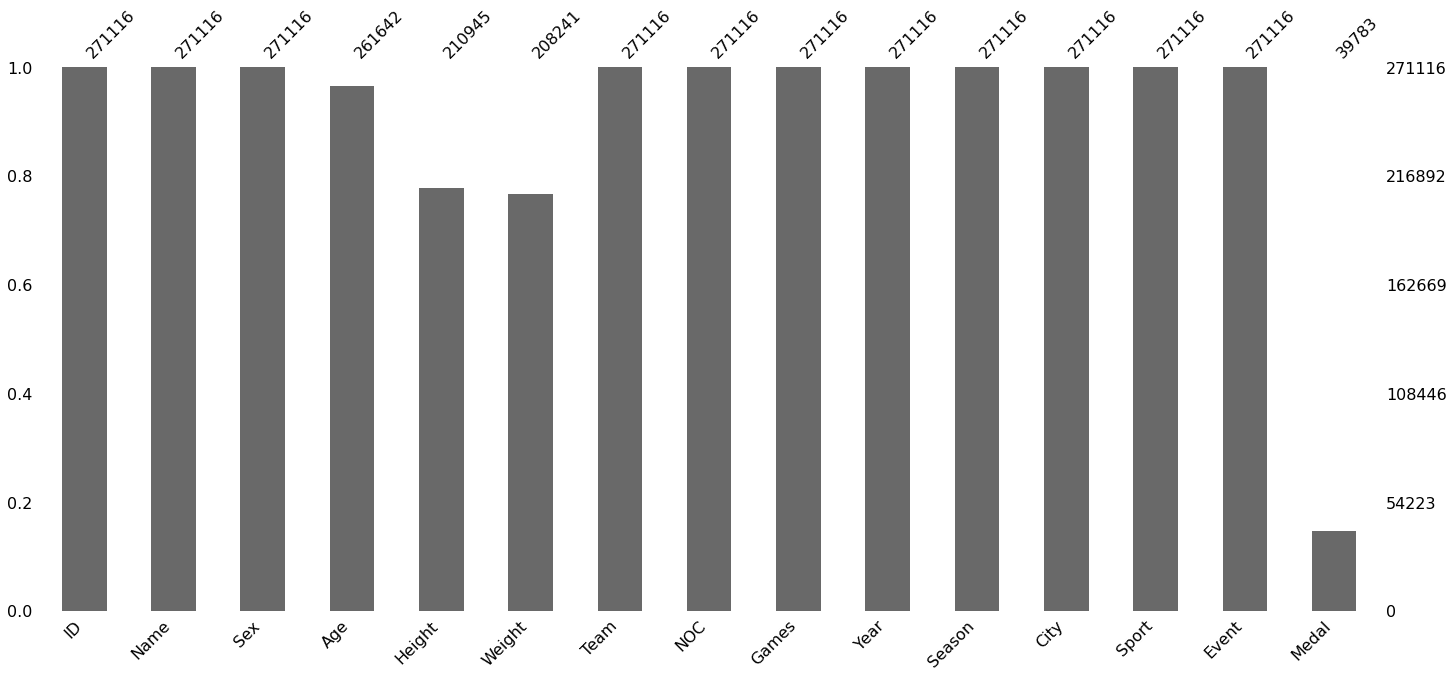

In [11]:
msno.bar(atletas)

<AxesSubplot:>

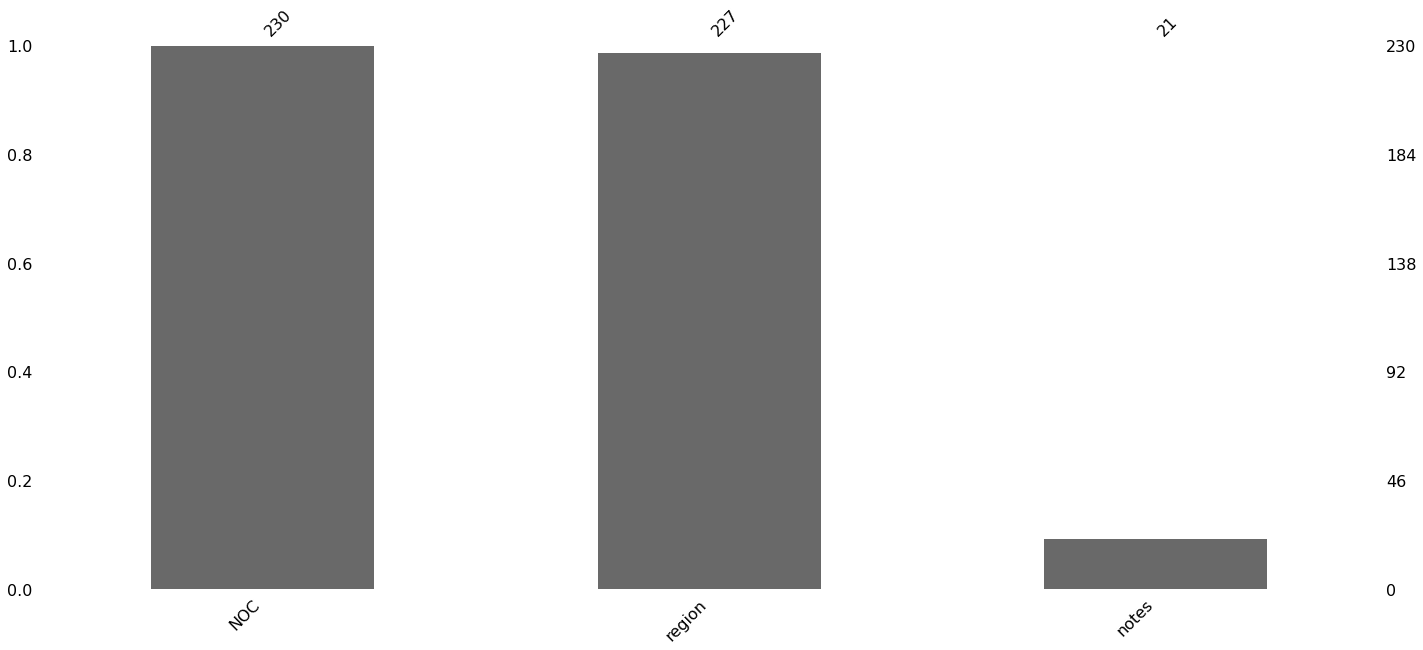

In [12]:
msno.bar(noc)

### estatisticas descritivas

In [13]:
atletas.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [14]:
atletas[atletas['Age'] == 10]

ID                Name Sex   Age  Height  Weight  \
142882  71691  Dimitrios Loundras   M  10.0     NaN     NaN   

                                 Team  NOC        Games  Year  Season    City  \
142882  Ethnikos Gymnastikos Syllogos  GRE  1896 Summer  1896  Summer  Athina   

             Sport                                  Event   Medal  
142882  Gymnastics  Gymnastics Men's Parallel Bars, Teams  Bronze

In [15]:
noc.describe()

NOC   region         notes
count   230      227            21
unique  230      206            21
top     SCG  Germany  Newfoundland
freq      1        4             1

In [16]:
rio2016 = atletas[atletas['Year'] == 2016]

In [17]:
rio2016.head(10)

ID                 Name Sex   Age  Height  Weight        Team  NOC  \
80   22        Andreea Aanei   F  22.0   170.0   125.0     Romania  ROU   
139  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
140  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
141  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
142  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
143  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
144  51    Nstor Abad Sanjun   M  23.0   167.0    64.0       Spain  ESP   
148  55  Antonio Abadia Beci   M  26.0   170.0    65.0       Spain  ESP   
158  62    Giovanni Abagnale   M  21.0   198.0    90.0       Italy  ITA   
161  65    Patimat Abakarova   F  21.0   165.0    49.0  Azerbaijan  AZE   

           Games  Year  Season            City          Sport  \
80   2016 Summer  2016  Summer  Rio de Janeiro  Weightlifting   
139  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
140  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
141  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
142  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
143  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
144  2016 Summer  2016  Summer  Rio de Janeiro     Gymnastics   
148  2016 Summer  2016  Summer  Rio de Janeiro      Athletics   
158  2016 Summer  2016  Summer  Rio de Janeiro         Rowing   
161  2016 Summer  2016  Summer  Rio de Janeiro      Taekwondo   

                                       Event   Medal  
80   Weightlifting Women's Super-Heavyweight     NaN  
139   Gymnastics Men's Individual All-Around     NaN  
140          Gymnastics Men's Floor Exercise     NaN  
141           Gymnastics Men's Parallel Bars     NaN  
142          Gymnastics Men's Horizontal Bar     NaN  
143                   Gymnastics Men's Rings     NaN  
144         Gymnastics Men's Pommelled Horse     NaN  
148             Athletics Men's 5,000 metres     NaN  
158               Rowing Men's Coxless Pairs  Bronze  
161              Taekwondo Women's Flyweight  Bronze

### quantas medalhas tiveram no rio2016

In [18]:
rio2016['Medal'].count()

2023

### quantas medalhas por tipode medalha teve em 2016

In [19]:
#rio2016.groupby('Medal')['Medal'].count()
rio2016['Medal'].value_counts()

Bronze    703
Gold      665
Silver    655
Name: Medal, dtype: int64

### quantas medalhas por atletas teve no rio 2016

In [20]:
#rio2016.groupby(['Name','Medal'])['Medal'].count().sort_values(ascending=False)
rio2016[['Name', 'Medal']].value_counts()

Name                                Medal 
Michael Fred Phelps, II             Gold      5
Simone Arianne Biles                Gold      4
Kathleen Genevieve "Katie" Ledecky  Gold      4
Katinka Hossz                       Gold      3
Usain St. Leo Bolt                  Gold      3
                                             ..
Moritz Trompertz                    Bronze    1
Morolake Akinosun                   Gold      1
Morten Jrgensen                     Silver    1
Morten Olsen                        Gold      1
Aaron Brown                         Bronze    1
Length: 1944, dtype: int64

### distribuição de medalhas por esporte e pais

In [21]:
#rio2016[['Sport','Medal']].value_counts()
rio2016[rio2016['Medal'].notnull()].groupby(['NOC','Sport','Medal'])['Medal'].count().sort_values( ascending=False)

NOC  Sport       Medal 
USA  Swimming    Gold      48
GER  Hockey      Bronze    33
FRA  Handball    Silver    31
USA  Athletics   Gold      27
     Volleyball  Bronze    24
                           ..
GBR  Golf        Gold       1
POL  Athletics   Silver     1
                 Gold       1
GBR  Gymnastics  Silver     1
VIE  Shooting    Silver     1
Name: Medal, Length: 620, dtype: int64

### medalhas por pais/sport/evento-modalidade

In [22]:
rio2016[rio2016['Medal'].notnull()].groupby(['NOC','Sport','Medal'])[['Event']].nunique()

Event
NOC Sport     Medal        
ALG Athletics Silver      2
ARG Hockey    Gold        1
    Judo      Gold        1
    Sailing   Gold        1
    Tennis    Silver      1
...                     ...
VEN Athletics Silver      1
    Boxing    Bronze      1
    Cycling   Bronze      1
VIE Shooting  Gold        1
              Silver      1

[620 rows x 1 columns]

In [23]:
medalhas = atletas.groupby(['NOC','Event','Medal']).nunique().index

### qual pais ganhou mais medalhas por evento

In [24]:
medalhas = medalhas.to_frame()

In [25]:
medalhas.head()

NOC                          Event  \
NOC Event                         Medal                                        
AFG Taekwondo Men's Featherweight Bronze  AFG  Taekwondo Men's Featherweight   
    Taekwondo Men's Flyweight     Bronze  AFG      Taekwondo Men's Flyweight   
AHO Sailing Mixed Windsurfer      Silver  AHO       Sailing Mixed Windsurfer   
ALG Athletics Men's 1,500 metres  Gold    ALG   Athletics Men's 1,500 metres   
                                  Silver  ALG   Athletics Men's 1,500 metres   

                                           Medal  
NOC Event                         Medal           
AFG Taekwondo Men's Featherweight Bronze  Bronze  
    Taekwondo Men's Flyweight     Bronze  Bronze  
AHO Sailing Mixed Windsurfer      Silver  Silver  
ALG Athletics Men's 1,500 metres  Gold      Gold  
                                  Silver  Silver

In [26]:
medalhas = medalhas.reset_index(drop=True)

In [27]:
medalhas.head()

NOC                          Event   Medal
0  AFG  Taekwondo Men's Featherweight  Bronze
1  AFG      Taekwondo Men's Flyweight  Bronze
2  AHO       Sailing Mixed Windsurfer  Silver
3  ALG   Athletics Men's 1,500 metres    Gold
4  ALG   Athletics Men's 1,500 metres  Silver

# pivotando os dados

In [28]:
medalhas.pivot_table(values='NOC', index='Event', columns='Medal', aggfunc='first')

Medal                                          Bronze Gold Silver
Event                                                            
Aeronautics Mixed Aeronautics                     NaN  SUI    NaN
Alpine Skiing Men's Combined                      AUT  AUT    AUT
Alpine Skiing Men's Downhill                      AUT  AUT    AUT
Alpine Skiing Men's Giant Slalom                  AUT  AUT    AUT
Alpine Skiing Men's Slalom                        AUT  AUT    AUT
...                                               ...  ...    ...
Wrestling Women's Flyweight, Freestyle            AZE  CAN    AZE
Wrestling Women's Heavyweight, Freestyle          CHN  CAN    BUL
Wrestling Women's Light-Heavyweight, Freestyle    KAZ  JPN    RUS
Wrestling Women's Lightweight, Freestyle          AZE  JPN    CAN
Wrestling Women's Middleweight, Freestyle         FRA  JPN    BLR

[756 rows x 3 columns]

### analisar quem ganhou medalha de ouro

In [29]:
gold = atletas[atletas['Medal']=='Gold'].copy()

In [30]:
gold.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal  
3        Tug-Of-War Men's Tug-Of-War  Gold  
42  Gymnastics Men's Team All-Around  Gold  
44      Gymnastics Men's Horse Vault  Gold  
48  Gymnastics Men's Pommelled Horse  Gold  
60       Alpine Skiing Men's Super G  Gold

<AxesSubplot:>

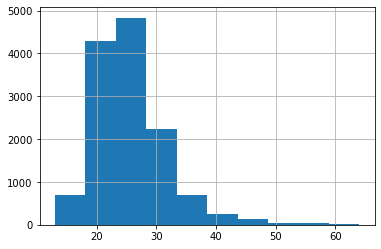

In [31]:
# distribuição da idade
gold['Age'].hist()

<AxesSubplot:xlabel='Age', ylabel='Count'>

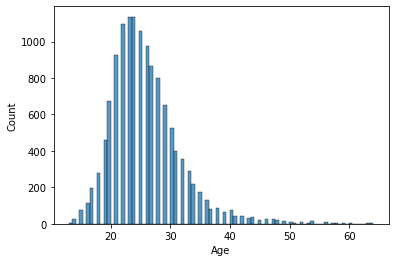

In [32]:
sns.histplot(gold['Age'])

### Padronização da idade

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()

In [36]:
sts_age = sc.fit_transform(gold[['Age']])

In [37]:
sts_age

array([[ 1.37441854],
       [ 0.35620335],
       [ 0.35620335],
       ...,
       [ 0.52590588],
       [ 0.86531094],
       [-0.83171436]])

<AxesSubplot:ylabel='Count'>

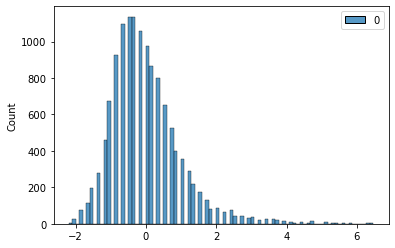

In [38]:
sns.histplot(sts_age)

### tratamendo de ruidos e discretizacao

In [39]:
gold['Age'].describe()

count    13224.000000
mean        25.901013
std          5.892887
min         13.000000
25%         22.000000
50%         25.000000
75%         29.000000
max         64.000000
Name: Age, dtype: float64

In [44]:
bins = pd.qcut(gold['Age'], 10)
bins.head()

3       (33.0, 64.0]
42      (26.0, 28.0]
44      (26.0, 28.0]
48      (26.0, 28.0]
60    (12.999, 20.0]
Name: Age, dtype: category
Categories (10, interval[float64]): [(12.999, 20.0] < (20.0, 21.0] < (21.0, 23.0] < (23.0, 24.0] ... (26.0, 28.0] < (28.0, 30.0] < (30.0, 33.0] < (33.0, 64.0]]

In [45]:
grupos = gold['Age'].groupby(bins)
grupos.head()

3       34.0
42      28.0
44      28.0
48      28.0
60      20.0
73      30.0
76      30.0
78      34.0
79      27.0
113     31.0
117     25.0
150     21.0
172     28.0
173     23.0
178     22.0
182     22.0
200     38.0
218     22.0
219     29.0
220     34.0
221     22.0
222     26.0
226     25.0
227     29.0
524     38.0
550     26.0
587     26.0
591     29.0
620     26.0
710     15.0
711     19.0
787     19.0
885     21.0
915     24.0
921     21.0
1080    20.0
1126    24.0
1254    26.0
1345    21.0
1366    24.0
1375    24.0
1472    31.0
1495    33.0
1668    25.0
2100    33.0
2170     NaN
2478    21.0
2480    25.0
2653    25.0
2691    31.0
2815    24.0
4015     NaN
4112     NaN
4821     NaN
7498     NaN
Name: Age, dtype: float64

In [46]:
medias = grupos.mean()
medias.head()

Age
(12.999, 20.0]    18.548721
(20.0, 21.0]      21.000000
(21.0, 23.0]      22.508961
(23.0, 24.0]      24.000000
(24.0, 25.0]      25.000000
Name: Age, dtype: float64

In [47]:
new_age = bins.apply(lambda x: medias[x])

In [49]:
gold.loc[:,'age_bin'] = new_age

In [50]:
gold.head()

ID                     Name Sex   Age  Height  Weight            Team  \
3    4     Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
42  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
44  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
48  17  Paavo Johannes Aaltonen   M  28.0   175.0    64.0         Finland   
60  20       Kjetil Andr Aamodt   M  20.0   176.0    85.0          Norway   

    NOC        Games  Year  Season         City          Sport  \
3   DEN  1900 Summer  1900  Summer        Paris     Tug-Of-War   
42  FIN  1948 Summer  1948  Summer       London     Gymnastics   
44  FIN  1948 Summer  1948  Summer       London     Gymnastics   
48  FIN  1948 Summer  1948  Summer       London     Gymnastics   
60  NOR  1992 Winter  1992  Winter  Albertville  Alpine Skiing   

                               Event Medal    age_bin  
3        Tug-Of-War Men's Tug-Of-War  Gold  39.147611  
42  Gymnastics Men's Team All-Around  Gold  27.481682  
44      Gymnastics Men's Horse Vault  Gold  27.481682  
48  Gymnastics Men's Pommelled Horse  Gold  27.481682  
60       Alpine Skiing Men's Super G  Gold  18.548721

<AxesSubplot:xlabel='age_bin', ylabel='Count'>

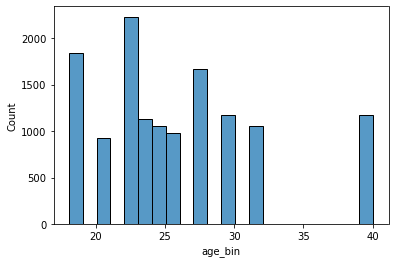

In [51]:
sns.histplot(gold['age_bin'])

In [52]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [55]:
alt.Chart(gold).mark_bar().encode(
    x = 'Age',
    y = 'count()',
    tooltip = ['Age','Sex','count()'],
    color = alt.Color('Sex')).interactive()

alt.Chart(...)

In [57]:
gold_50 = gold[gold['Age'] > 50]

In [61]:
gold_50['Sport'].value_counts()

Equestrianism       18
Sailing             12
Archery             11
Shooting            11
Art Competitions     8
Curling              2
Alpinism             1
Croquet              1
Roque                1
Name: Sport, dtype: int64

In [62]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gild Medals > 50 years')

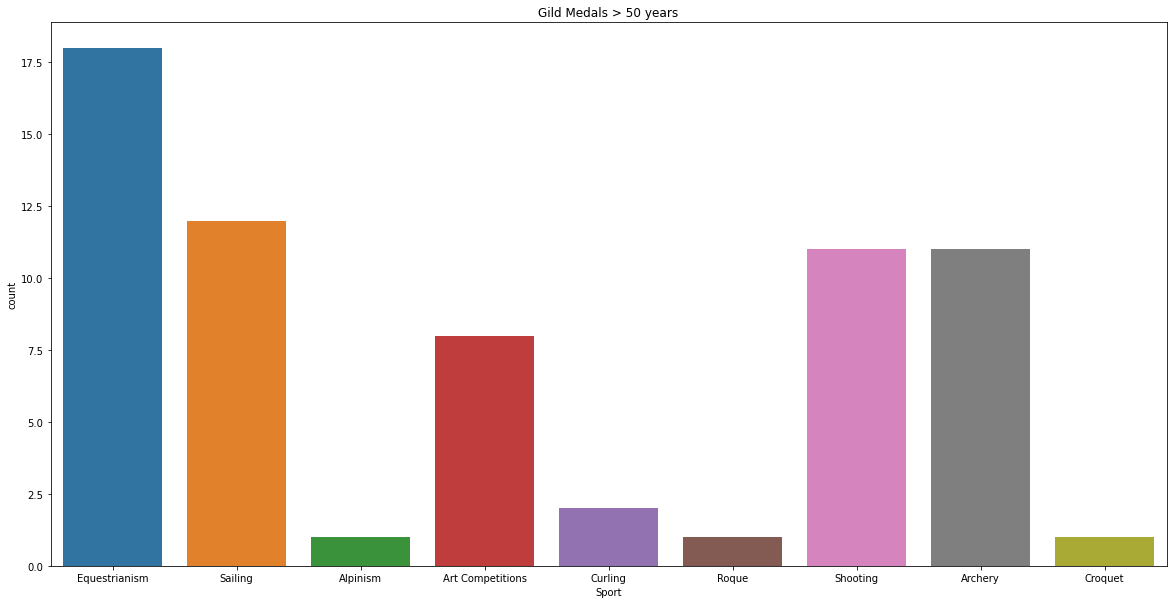

In [66]:
plt.figure(figsize=(20,10))
plt.tight_layout()
sns.countplot(gold_50['Sport'])
plt.title('Gild Medals > 50 years')